Jogando em casa Kashiwa Reysol
FT 80% das partidas - de  11.0 escanteios
FT 90% das partidas + de  6.0 escanteios
1H 80% das partidas -  5.0 escanteios
1H 80% das partidas + de  2.0 escanteios
1H partidas com menos de 6  93 %
Partidas com saldo de escanteios positivo:  50 %
Partidas com saldo de escanteios negativo:  36 %
Partidas escanteios empatados:  14 %
Média escanteios por partida:  8
desvio padrão:  3


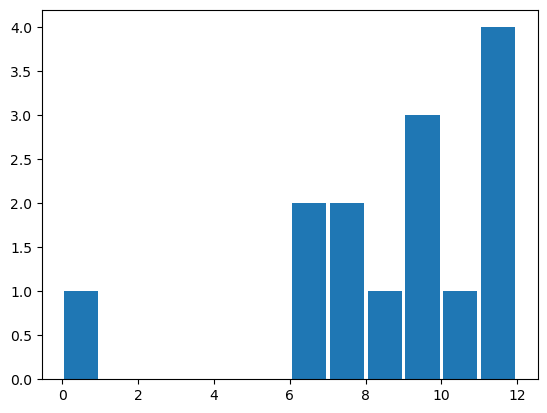

,first_half_corners_for,second_half_corners_for,match_corners_for,first_half_corners_against,second_half_corners_against,match_corners_against,total_match_corners,total_first_half_corners,total_second_half_corners,home_or_away,corners_balance
2,2,8,10,0,0,0,10,2,8,Home,10
3,1,3,4,1,4,5,9,2,7,Home,-1
5,0,0,0,0,0,0,0,0,0,Home,0
6,0,5,5,3,0,3,8,3,5,Home,2
7,0,1,1,5,6,11,12,5,7,Home,-10
9,2,0,2,2,2,4,6,4,2,Home,-2
11,1,2,3,4,0,4,7,5,2,Home,-1
14,1,2,3,2,1,3,6,3,3,Home,0
16,6,0,6,1,4,5,11,7,4,Home,1
19,1,1,2,3,4,7,9,4,5,Home,-5


Jogando fora de casa Urawa Red Diamonds
FT 80% das partidas - de  11.8 escanteios
FT 90% das partidas + de  4.1 escanteios
1H 80% das partidas -  5.0 escanteios
1H 80% das partidas + de  3.0 escanteios
1H partidas com menos de 6  83 %
Partidas com saldo de escanteios positivo:  33 %
Partidas com saldo de escanteios negativo:  58 %
Partidas escanteios empatados:  8 %
Média escanteios por partida:  8
desvio padrão:  4
Média escanteios por partida:  8
desvio padrão:  4


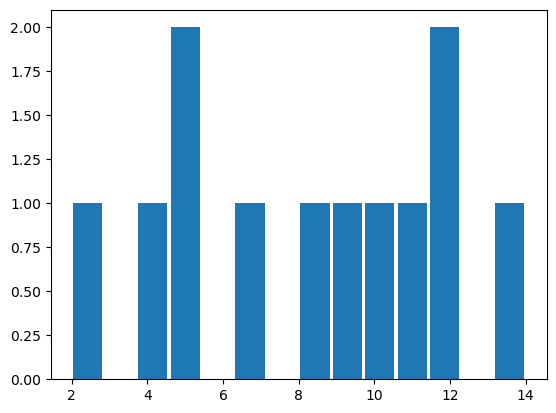

,first_half_corners_for,second_half_corners_for,match_corners_for,first_half_corners_against,second_half_corners_against,match_corners_against,total_match_corners,total_first_half_corners,total_second_half_corners,home_or_away,corners_balance
2,0,0,0,4,4,8,8,4,4,Away,-8
3,2,3,5,1,6,7,12,3,9,Away,-2
5,4,0,4,7,0,7,11,11,0,Away,-3
6,0,0,0,2,0,2,2,2,0,Away,-2
9,2,1,3,4,5,9,12,6,6,Away,-6
12,2,3,5,3,2,5,10,5,5,Away,0
14,4,7,11,1,2,3,14,5,9,Away,8
15,1,2,3,3,1,4,7,4,3,Away,-1
18,2,2,4,0,1,1,5,2,3,Away,3
22,2,0,2,1,6,7,9,3,6,Away,-5


In [11]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

def get_corner_stats(team_url:str,is_home:bool):
    html = requests.get(team_url).content

    soup = BeautifulSoup(html, 'html.parser')

    team_name = soup.find("meta", {"name":"description"})["content"]
    team_name = team_name.split(",")[0].replace('Team: ','')
    first_half_corners_for = []
    second_half_corners_for = []
    match_corners_for = []
    first_half_corners_against = []
    second_half_corners_against = []
    match_corners_against = []
    total_match_corners = []
    total_first_half_corners = []
    total_second_half_corners =[]
    home_or_away = []
    corners_balance =[]



    table_rows = soup.findAll("tr")
    for rows in table_rows:
        if rows.find("span", class_="span_half_corner hide"):
            continue
        match = rows.find("td", class_="match_home")
        if match != None:
            home_team = match.find('a').text
        else:
            continue
        match = rows.find("td", class_="match_away")
        if match != None:
            away_team = match.find('a').text
        half_corners = rows.find("span", class_="span_half_corner").text
        match_corners = rows.find("span", class_="span_match_corner").text
        home_half_corners = half_corners.replace('(','').replace(')','').split('-')[0]
        away_half_corners = half_corners.replace('(','').replace(')','').split('-')[1]
        home_match_corners = match_corners.split(' ')[0]
        away_match_corners = match_corners.split(' ')[-1]
        home_second_half_corners = int(home_match_corners) - int(home_half_corners)
        away_second_half_corners = int(away_match_corners) - int(away_half_corners)
        if home_team == team_name:
            balance = int(home_match_corners) - int(away_match_corners)
            first_half_corners_for.append(int(home_half_corners))
            second_half_corners_for.append(int(home_second_half_corners))
            match_corners_for.append(int(home_match_corners))
            first_half_corners_against.append(int(away_half_corners))
            second_half_corners_against.append(int(away_second_half_corners))
            match_corners_against.append(int(away_match_corners))
            total_match_corners.append(int(home_match_corners) + int(away_match_corners))
            total_first_half_corners.append(int(home_half_corners) + int(away_half_corners))
            total_second_half_corners.append(int(home_second_half_corners) + int(away_second_half_corners))
            home_or_away.append('Home')
            corners_balance.append(balance)

        else:
            balance = int(away_match_corners) - int(home_match_corners)
            first_half_corners_for.append(int(away_half_corners))
            second_half_corners_for.append(int(away_second_half_corners))
            match_corners_for.append(int(away_match_corners))
            first_half_corners_against.append(int(home_half_corners))
            second_half_corners_against.append(int(home_second_half_corners))
            match_corners_against.append(int(home_match_corners))
            total_match_corners.append(int(home_match_corners) + int(away_match_corners))
            total_first_half_corners.append(int(home_half_corners) + int(away_half_corners))
            total_second_half_corners.append(int(home_second_half_corners) + int(away_second_half_corners))
            home_or_away.append('Away')
            corners_balance.append(balance)

    df = pd.DataFrame(list(zip(
            first_half_corners_for,
            second_half_corners_for,
            match_corners_for,
            first_half_corners_against,
            second_half_corners_against,
            match_corners_against,
            total_match_corners,
            total_first_half_corners,
            total_second_half_corners,
            home_or_away,
            corners_balance,
        )),
        columns=[
            'first_half_corners_for',
            'second_half_corners_for',
            'match_corners_for',
            'first_half_corners_against',
            'second_half_corners_against',
            'match_corners_against',
            'total_match_corners',
            'total_first_half_corners',
            'total_second_half_corners',
            'home_or_away',
            'corners_balance',

        ])
    if is_home:
        return (team_name, df[(df.home_or_away == "Home")])
    else:
        return (team_name, df[(df.home_or_away == "Away")])


#team_url = input("Url totalcorner do time da casa\n")
#team2_url = input("Url totalcorner do time visitante\n")
team_url = "https://www.totalcorner.com/team/view/740"
team2_url = "https://www.totalcorner.com/team/view/746"

 
home_name, df_home = get_corner_stats(team_url,True)
away_name, df_away = get_corner_stats(team2_url,False)
print('Jogando em casa', home_name)
print('FT 80% das partidas - de ', df_home.total_match_corners.quantile(0.8), "escanteios")
print('FT 90% das partidas + de ', df_home.total_match_corners.quantile(0.1), "escanteios")
print('1H 80% das partidas - ', df_home.total_first_half_corners.quantile(0.8), "escanteios")
print('1H 80% das partidas + de ', df_home.total_first_half_corners.quantile(0.2), "escanteios")
print('1H partidas com menos de 6 ', round((df_home.total_first_half_corners < 6).mean()*100), "%")
print('Partidas com saldo de escanteios positivo: ', round((df_home.corners_balance > 0).mean()*100), "%")
print('Partidas com saldo de escanteios negativo: ', round((df_home.corners_balance < 0).mean()*100), "%")
print('Partidas escanteios empatados: ', round((df_home.corners_balance == 0).mean()*100), "%")
print('Média escanteios por partida: ', round((df_home.total_match_corners).mean()))
print('desvio padrão: ', round((df_home.total_match_corners).std()))
plt.hist(df_home.total_match_corners.tolist(), int(df_home.total_match_corners.quantile(1)), rwidth=0.9)
plt.show()
display(df_home)
print('Jogando fora de casa', away_name)
print('FT 80% das partidas - de ', df_away.total_match_corners.quantile(0.8), "escanteios")
print('FT 90% das partidas + de ', df_away.total_match_corners.quantile(0.1), "escanteios")
print('1H 80% das partidas - ', df_away.total_first_half_corners.quantile(0.8), "escanteios")
print('1H 80% das partidas + de ', df_away.total_first_half_corners.quantile(0.2), "escanteios")
print('1H partidas com menos de 6 ', round((df_away.total_first_half_corners < 6).mean()*100), "%")
print('Partidas com saldo de escanteios positivo: ', round((df_away.corners_balance > 0).mean()*100), "%")
print('Partidas com saldo de escanteios negativo: ', round((df_away.corners_balance < 0).mean()*100), "%")
print('Partidas escanteios empatados: ', round((df_away.corners_balance == 0).mean()*100), "%")
print('Média escanteios por partida: ', round((df_away.total_match_corners).mean()))
print('desvio padrão: ', round((df_away.total_match_corners).std()))
print('Média escanteios por partida: ', round((df_away.total_match_corners).mean()))
print('desvio padrão: ', round((df_away.total_match_corners).std()))
plt.hist(df_away.total_match_corners.tolist(), int(df_away.total_match_corners.quantile(1)), rwidth=0.9)
plt.show()
display(df_away)
